# *climate stripes* von E-OBS

**Katharina Bülow**, Climate Service Center Germany (GERICS), Helmholtz-Zentrum hereon GmbH, Email: katharina.buelow@hereon.de

In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [6]:
import warnings
warnings.filterwarnings('ignore')

#### Organization der Verzeichniss und Input Daten

In [17]:
# organising some directories and output files

workdir = os.getcwd()
datadir=workdir.split('Notebooks')[0]

filenameT = "input_data/eobs/year/TG/climdexEOBS_TG_year_weighted_means.csv"
inputT = os.path.join(datadir, filenameT)

plotdir = "EOBS-Plots"
outdir = os.path.join(workdir.replace("EOBS", plotdir))
if not os.path.exists(outdir):
    os.makedirs(outdir)

#### Region auswählen:

In [25]:
# Region
# region = "02000_Hamburg"
# ort='Hamburg'
region = "08212_08215_07334_Region_um_Karlsruhe"
ort = "Karlsruhe"
plotname = "Climatestripes_deviation_to_1971_2000_EOBS_" + region+".png"
figure = os.path.join(outdir, plotname)

In [26]:
def select_region(df, region):
    return df.loc[(df["region"].isin([region]))]

In [27]:
def deviation(df):
    df["time"] = pd.to_datetime(df["time"])
    df_ = df.copy()
    start = "1971-01-01"
    end = "2000-12-31"

    mask = (df_["time"] >= start) & (df_["time"] <= end)

    df_new = df_[mask]
    hist = df_new["value"].mean()
    # print(hist)
    df["Temperature anomaly [°C]"] = df["value"] - hist

    # just nice to have for plotting:
    df["year"] = pd.DatetimeIndex(df["time"]).year

    return df

In [28]:
df = pd.read_csv(inputT)
dfr = select_region(df, region)
dfn = deviation(dfr)

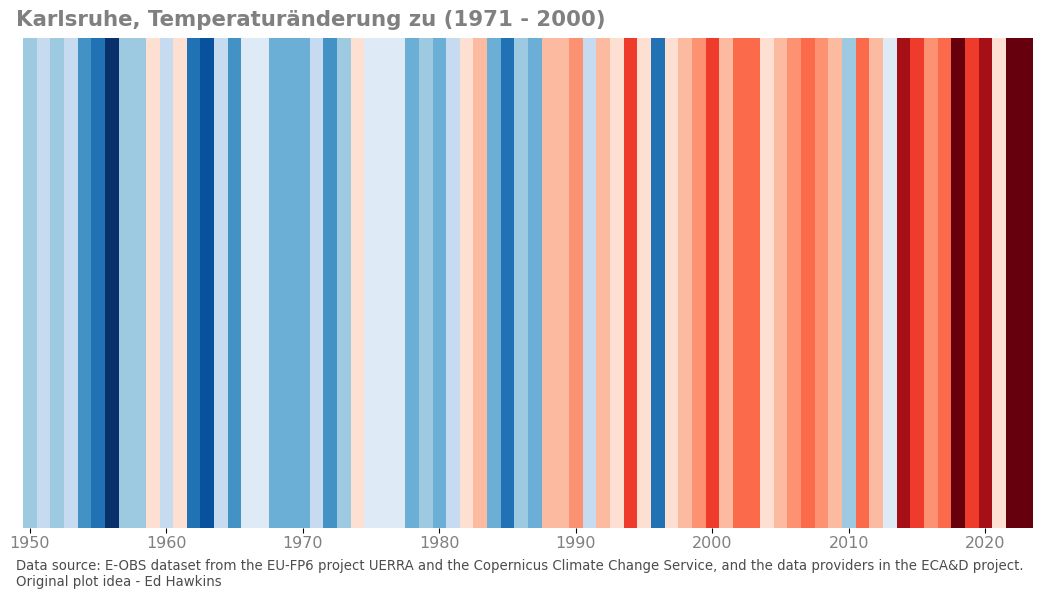

In [29]:
# create plot:
#
# source of plotting routine: https://towardsdatascience.com/visualizing-climate-change-a-step-by-step-guide-to-reproduce-climate-stripes-with-python-ea1d440e8e8d
# Create the figure and axes objects, specify the size and the dots per inches
fig, ax = plt.subplots(figsize=(13.33, 7.5), dpi=96)

# Colours - Choose the colour map - 8 blues and 8 reds
cmap = ListedColormap(
    [
        "#08306b",
        "#08519c",
        "#2171b5",
        "#4292c6",
        "#6baed6",
        "#9ecae1",
        "#c6dbef",
        "#deebf7",
        "#fee0d2",
        "#fcbba1",
        "#fc9272",
        "#fb6a4a",
        "#ef3b2c",
        "#cb181d",
        "#a50f15",
        "#67000d",
    ]
)

# linearly normalizes data into the [0.0, 1.0] interval
norm = mpl.colors.Normalize(
    dfn["Temperature anomaly [°C]"].min(), dfn["Temperature anomaly [°C]"].max()
)

# Plot bars
bar = ax.bar(
    dfn["year"],
    1,
    color=cmap(norm(dfn["Temperature anomaly [°C]"])),
    width=1,
    zorder=2,
)

# Remove the spines
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)

# Reformat y-axis label and tick labels
ax.set_ylabel("", fontsize=12, labelpad=10)
ax.set_yticks([])
ax.set_ylim([0, 1])

# Reformat x-axis label and tick labels
ax.set_xlabel("", fontsize=12, labelpad=10)
ax.xaxis.set_tick_params(
    pad=2,
    labelbottom=True,
    bottom=True,
    labelsize=12,
    labelrotation=0,
    labelcolor="grey",
)
ax.set_xlim([dfn["year"].min() - 1, dfn["year"].max() + 1])

# Set graph title
ax.set_title(
    ort + ", Temperaturänderung zu (1971 - 2000)",
    loc="left",
    color="grey",
    fontweight="bold",
    size=16,
    pad=10,
)

# Set source text
# better dobble check
ax.text(
    x=0.1,
    y=0.12,
    s="Data source: E-OBS dataset from the EU-FP6 project UERRA and the Copernicus Climate Change Service, and the data providers in the ECA&D project.\nOriginal plot idea - Ed Hawkins",
    transform=fig.transFigure,
    ha="left",
    fontsize=10,
    alpha=0.7,
)

# Adjust the margins around the plot area
plt.subplots_adjust(
    left=0.1, right=None, top=None, bottom=0.2, wspace=None, hspace=None
)

# Set a white background
fig.patch.set_facecolor("white")
ax.patch.set_facecolor("white")
plt.savefig(figure, dpi=300)

In [15]:
figure

'/work/ch0636/g300047/GITHUB/climate-action-sheet-forestry/Notebooks/EOBS-Plots/Climatestripes_deviation_to_1971_2000_EOBS_08212_08215_07334_Region_um_Karlsruhe_1200.png'